In [1]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [2]:
from glob import glob
audio_files = glob('speech.wav')


In [3]:
import IPython.display as ipd

ipd.Audio(audio_files[0])

duration of the original audio signal 4.349024943310658


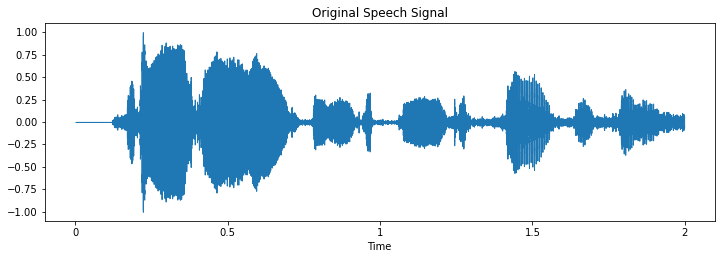

In [35]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
file_path = 'speech.wav'
original_signal, sr = librosa.load(file_path, sr=None)
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(original_signal, sr=sr)
plt.title('Original Speech Signal')
duration=librosa.get_duration(y=original_signal)
print("duration of the original audio signal",duration)



In [29]:
import librosa
import librosa.display
import soundfile as sf
import IPython.display as ipd

def remove_silence(file_path):
    signal, sr = librosa.load(file_path, sr=None)
    trimmed_signal, index = librosa.effects.trim(signal)

    return trimmed_signal, sr


original_audio_path = 'speech.wav'
trimmed_signal, sr = remove_silence(original_audio_path)
trimmed_audio_path = 'trimmed_audio.wav'
sf.write(trimmed_audio_path, trimmed_signal, sr)

#print("Listening to the original audio:")
#ipd.Audio(original_audio_path)

print("Listening to the trimmed audio:")
ipd.Audio(trimmed_audio_path)


Listening to the trimmed audio:


duration of the trimmed audio signal 4.116825396825397
sampling rate of trimmed audio 48000


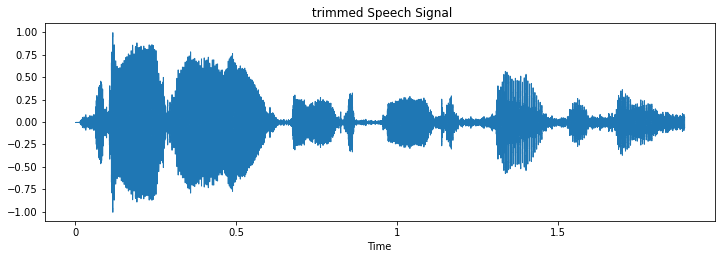

In [34]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
audio = 'trimmed_audio.wav'
trim_signal, sr = librosa.load(audio, sr=None)
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(trim_signal, sr=sr)
plt.title(' trimmed Speech Signal')
duration=librosa.get_duration(y=trim_signal)
print("duration of the trimmed audio signal",duration)
print('sampling rate of trimmed audio',sr)

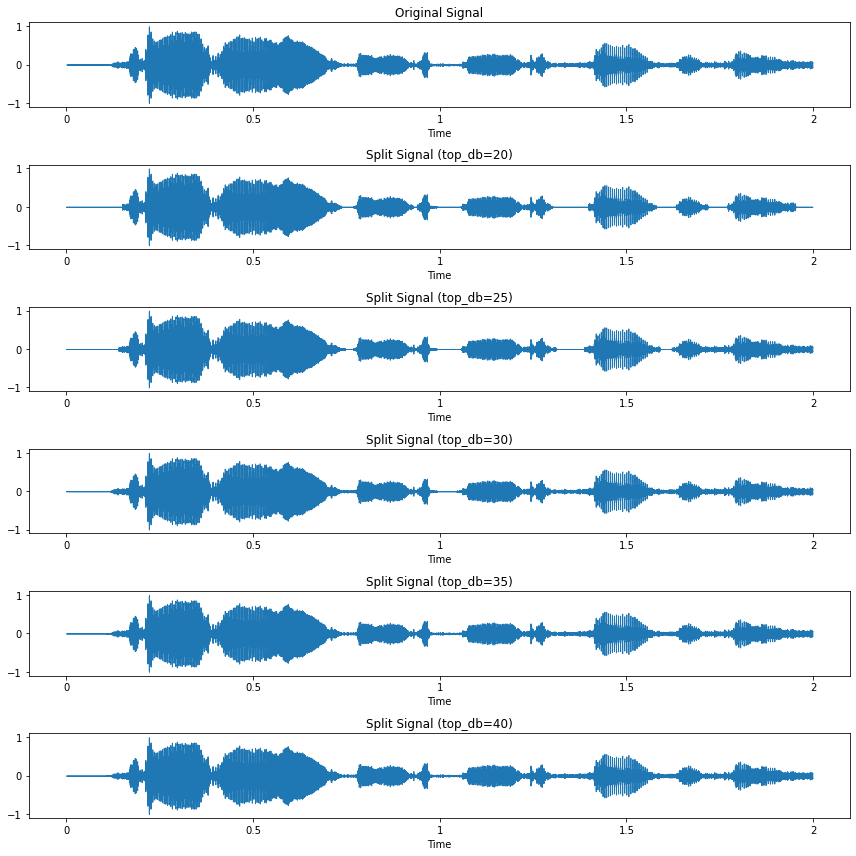

In [27]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

# Load the audio file
file_path = "speech.wav"
signal, sr = librosa.load(file_path, sr=None)


top_db_values = [20,25,30,35,40] 
split_signals = []

for top_db in top_db_values:
    split_signal = librosa.effects.split(signal, top_db=top_db)
    split_signals.append(split_signal)

plt.figure(figsize=(12, 12))
plt.subplot(len(top_db_values) + 1, 1, 1)
librosa.display.waveshow(signal, sr=sr)
plt.title('Original Signal')

for i, split_signal in enumerate(split_signals):
    plt.subplot(len(top_db_values) + 1, 1, i + 2)
    split_signal_plot = np.zeros_like(signal)
    for interval in split_signal:
        split_signal_plot[interval[0]:interval[1]] = signal[interval[0]:interval[1]]
    librosa.display.waveshow(split_signal_plot, sr=sr)
    plt.title(f'Split Signal (top_db={top_db_values[i]})')

    split_audio = np.concatenate([signal[interval[0]:interval[1]] for interval in split_signal])
    display(Audio(data=split_audio, rate=sr))

plt.tight_layout()
plt.show()

In [ ]:
''' A3
 A lower top_db value sets a lower threshold for amplitude. This means that smaller amplitude values 
 will be considered as part of silent sections. Consequently, more portions of the signal, including 
 quieter sections, might be identified as silent.
 
 A higher top_db value sets a higher threshold for amplitude. This means that only sections of the 
 audio signal with amplitudes significantly higher than the threshold will be considered as non-silent. 
 Quieter sections or those close to silence might not be identified as silent with a higher top_db.
 *******
 the paper introduces a method based on the continuous average energy of the speech signal. This approach
 involves analyzing the energy levels in the signal, using a continuous average, and applying a threshold to 
 detect and remove silence segments.The proposed method achieved a 100% detection rate for unvoiced segments in 
 speech signals, even in very noisy environments with a signal-to-noise ratio (SNR) of -10 dB.
'''